#  Анализ данных в задаче кредитного скоринга
## Peer review

In [1]:
import scipy
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Для выполнения этого задания вам понадобятся данные о кредитных историях клиентов одного из банков. Поля в предоставляемых данных имеют следующий смысл:
- LIMIT_BAL: размер кредитного лимита (в том числе и на семью клиента)
- SEX: пол клиента (1 = мужской, 2 = женский )
- EDUCATION: образование (0 = доктор, 1 = магистр; 2 = бакалавр; 3 = выпускник школы; 4 = начальное образование; 5 = прочее; 6 = нет данных ).
- MARRIAGE: (0 = отказываюсь отвечать; 1 = замужем/женат; 2 = холост; 3 = нет данных).
- AGE: возраст в годах
- PAY_0 - PAY_6 : История прошлых платежей по кредиту. PAY_6 - платеж в апреле, ... Pay_0 - платеж в сентябре. Платеж = (0 = исправный платеж, 1 = задержка в один месяц, 2 = задержка в 2 месяца ...)
- BILL_AMT1 - BILL_AMT6: задолженность, BILL_AMT6 - на апрель, BILL_AMT1 - на сентябрь
- PAY_AMT1 - PAY_AMT6: сумма уплаченная в PAY_AMT6 - апреле, ..., PAY_AMT1 - сентябре
- default - индикатор невозврата денежных средств

In [2]:
data = pd.read_csv('credit_card_default_analysis.csv')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,0.356767,0.320033,0.304067,0.258767,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,0.760594,0.801727,0.790589,0.761113,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## Задание 1.
Размер кредитного лимита (LIMIT_BAL). В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы: 
- a) о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки 
- b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения?

Для сравнения медианных значений можно посмотреть на boxplot-ы для двух групп людей.

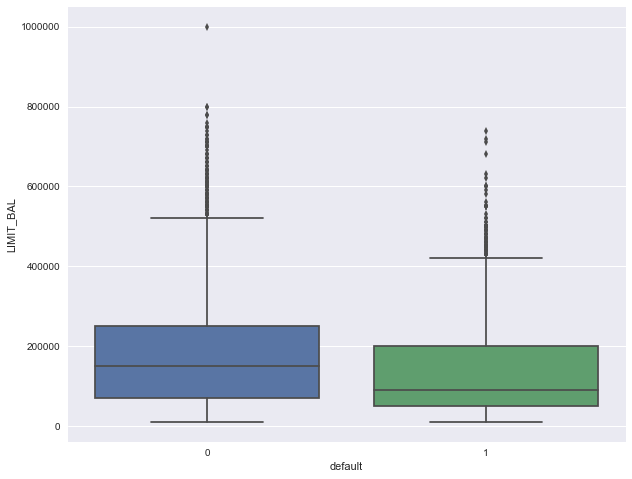

In [4]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='default', y='LIMIT_BAL', data=data);

По графику видно, что медианные значения размера кредитного лимита для вернувших и невернувших кредит отличаются. Выборки независимые, можно проверить с помощью бутстрепа, значимо ли это отличие.

In [5]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples


def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [6]:
np.random.seed(1)

default_limit = data[data['default'] == 1]['LIMIT_BAL'].values
non_default_limit = data[data['default'] == 0]['LIMIT_BAL'].values

default_median_scores = map(np.median, get_bootstrap_samples(default_limit, 1000))
non_default_median_scores = map(np.median, get_bootstrap_samples(non_default_limit, 1000))

print "95% confidence interval for the default median repair time:",  stat_intervals(default_median_scores, 0.05)
print "95% confidence interval for the non-default median repair time:",  stat_intervals(non_default_median_scores, 0.05)

95% confidence interval for the default median repair time: [ 80000.  90000.]
95% confidence interval for the non-default median repair time: [ 150000.  150000.]


Интервалы не пересекаются. Видно, что интервал медианного значения кредитного лимита для людей, вернувших кридит, лежит значительно правее. На уровне значимости $\alpha = 0.05$ гипотезу о равенстве средних медианных оценок кредитного лимита можно отвергнуть. Посмотрим также на точечную и интервальную оценки разности медиан.

In [7]:
print "difference between medians:", np.median(non_default_limit) - np.median(default_limit)

difference between medians: 60000.0


In [8]:
delta_median_scores = map(lambda x: x[1] - x[0], zip(default_median_scores, non_default_median_scores))
print "95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05)

95% confidence interval for the difference between medians [ 60000.  70000.]


Как и следовало ожидать, интервал лежит сильно правее нуля.

Проверим гипотезу о равенстве распределений. Для начала визуализируем распределения размера кредитного лимита.

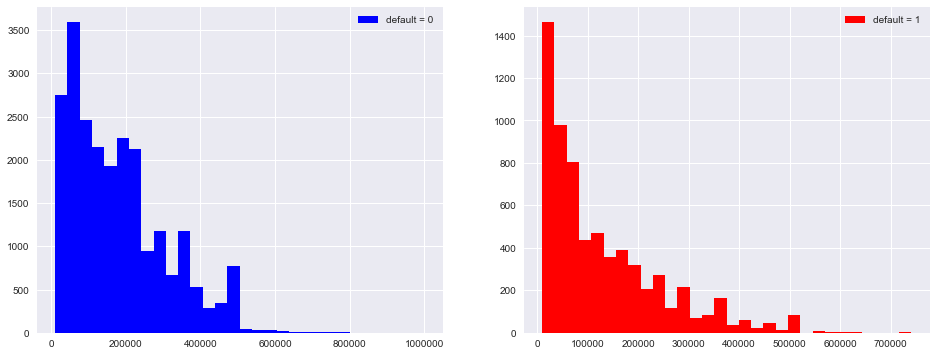

In [9]:
pylab.figure(figsize(16, 6))
pylab.subplot(1,2,1)
pylab.hist(data[data['default'] == 0]['LIMIT_BAL'], bins=30, color='b', label='default = 0')
pylab.legend()

pylab.subplot(1,2,2)
pylab.hist(data[data['default'] == 1]['LIMIT_BAL'], bins=30, color='r', label='default = 1')
pylab.legend()

pylab.show()

По графикам кажется, что распределения разные. У критерия Манна-Уитни есть ограничение применимости: "В выборочных данных не должно быть совпадающих значений (все числа — разные) или таких совпадений должно быть очень мало (до 10)." В нашей выборке совпадающих значений очень много, поэтому будем пользоваться перестановочным критерием для независимых выборок:

$H_0\colon F_{X_1}(x) = F_{X_2}(x)$

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$

In [10]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

In [11]:
def get_random_combinations(n1, n2, max_combinations):
    index = range(n1 + n2)
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

In [12]:
def permutation_zero_dist_ind(sample1, sample2, max_combinations=None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

In [13]:
def permutation_test(sample, mean, max_permutations=None, alternative='two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [14]:
print "p-value: %f" % permutation_test(non_default_limit, default_limit, max_permutations=1000)

p-value: 0.001000


На уровне значимости $\alpha = 0.05$ гипотезу о равенстве распределений можно отвергнуть. С практической точки зрения полученные результаты значимы. Например медианные значения кредитного лимита для двух выборок отличаются достаточно сильно у людей вернувших и не вернувших кредит.

## Задание 2.
Пол (SEX): Проверьте гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается. Хорошо, если вы предоставите несколько различных решений этой задачи (с помощью доверительного интервала и подходящего статистического критерия)

In [15]:
pd.crosstab(data['SEX'], data['default'], margins=True)

default,0,1,All
SEX,,,
1,9015,2873,11888
2,14349,3763,18112
All,23364,6636,30000


Построим countplot с разбивкой по полу среди людей вернувших и не вернувших кредит

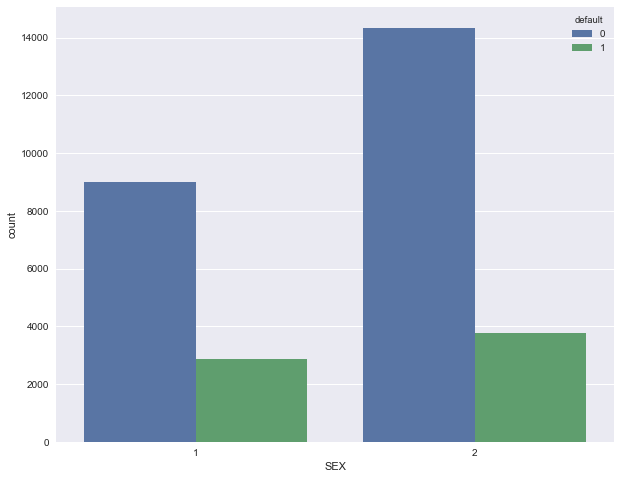

In [16]:
plt.figure(figsize=(10, 8))
sns.countplot(x='SEX', hue='default', data=data);

По графику кажется, что доля женщин, вернувших кредит, больше, чем мужчин. Посмотрим на интервальные оценки разности для двух долей. Так как заранее предположить невозможно, какая из долей будет больше, то в дальнейшем будем проверять гипотезу $H_0$: Доли в двух выборках равны. Против двухсторонней алтернативы: Доли как-то отличаются. 

In [17]:
def proportions_confint_diff_ind(sample1, sample2, alpha=0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1) / len(sample1) + p2 * (1 - p2) / len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1) / len(sample1) + p2 * (1 - p2) / len(sample2))
    
    return (left_boundary, right_boundary)

In [18]:
# сразу преобразуем данные в бинарные
default_sex = data[data['default'] == 1]['SEX'].values - 1
non_default_sex = data[data['default'] == 0]['SEX'].values - 1

In [19]:
print "confidence 95%% interval: [%f, %f]" % proportions_confint_diff_ind(non_default_sex, default_sex)

confidence 95% interval: [0.033635, 0.060548]


Получили 95% доверительный интервал разности для двух долей. Ноль в него не входит, на уровне значимости $\alpha = 0.05$ гипотеза о том, что гендерный состав группы людей вернувших и не вернувших кредит одинаковый отвергается. Выборка содержит всего 2 значения, а значит имеет распределение Бернулли, для расчёта p-value будем использовать Z критерий для разности двух долей.

In [20]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

In [21]:
def proportions_diff_z_test(z_stat, alternative='two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

In [22]:
print "p-value: {}".format(proportions_diff_z_test(proportions_diff_z_stat_ind(non_default_sex, default_sex)))

p-value: 4.47286652161e-12


Нулевая гипотеза уверенно отвергается в пользу альтернативы. Гендерный состав группы людей вернувших и не вернувших кредит отличается. С практической точки зрения пол может быть весомым фактором при выдаче кредита.

## Задание 3.
Образование (EDUCATION): Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг. Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. Например, составьте таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы разность между наблюдаемым и ожидаемым количеством человек. Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости? Наличие какого образования является наилучшим индикатором того, что человек отдаст долг? наоборт, не отдаст долг?

Посмотрим на распределения.

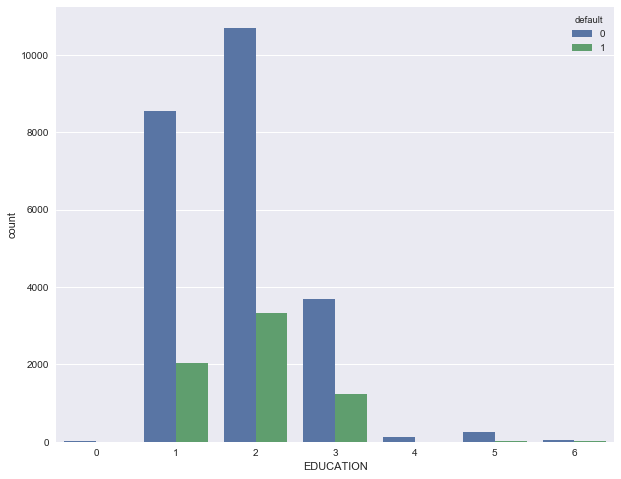

In [23]:
plt.figure(figsize=(10, 8))
sns.countplot(x='EDUCATION', hue='default', data=data);

Распределения среди вернувших и не вернувших долг кажуться похожими, соотношение везде практически одинаково, можно предположить, что образование не сильно влияет на возврат кредита.

In [24]:
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

Выборка несбалансирована, докторов и людей без данных очень мало, в основном выборка состоит из магистров, бакалавров и выпускников школ. Построим таблицу сопряженности для разность между наблюдаемым и ожидаемым количеством человек.

In [25]:
obs = pd.crosstab(data['EDUCATION'], data['default'])
expected = pd.DataFrame(np.round([obs.sum(axis=1) * obs.sum(axis=0)[0] / float(obs.sum().sum()),
                                  obs.sum(axis=1) * obs.sum(axis=0)[1] / float(obs.sum().sum())])).T
ctab = obs - expected
ctab

default,0,1
EDUCATION,,
0,3.0,-3.0
1,305.0,-305.0
2,-227.0,227.0
3,-149.0,149.0
4,20.0,-20.0
5,44.0,-44.0
6,3.0,-3.0


С учётом равенства отклонений по модулю будем рассматривать только вернувших кредит. Для приведения к одному масштабу выразим отклонение наблюдаемых величин от ожидаемых в процентах.

In [26]:
scaled_ctab = ctab[0] * 100 / obs[0]
scaled_ctab

EDUCATION
0    21.428571
1     3.567669
2    -2.121495
3    -4.048913
4    17.241379
5    16.793893
6     6.976744
Name: 0, dtype: float64

Видно, что для всех значений образования разница не равна нулю, можно сказать, что образование как-то влияет на вероятность возврата кредита. Наибольшая вероятность возврата кредита у докторов (хотя рассматривать их не корректно из-за их маленького количества в выборке), а наименьшая у людей со школьным образованием.

Проверим гипотезу о том, что образование никак не влияет на возврат кредита, против альтернативы, что оно как-то влияет. Будем пользоваться критерием хи-квадрат, для этого, сначала, проверим условия применимости:
- Выборки должны быть достаточно большими: n > 40.
- Ожидаемое количество элементов в каждой ячейке таблицы было меньше 5 не более, чем в 20% ячеек.

In [27]:
print 'samples size: {} and {}'.format(obs[0].sum(), obs[1].sum())
expected > 5

samples size: 23364 and 6636


,0,1
0,True,False
1,True,True
2,True,True
3,True,True
4,True,True
5,True,True
6,True,True


Условия корректности выполнены, вычислим статистику хи-квадрат.

In [28]:
chi2, p, dof, ex = scipy.stats.chi2_contingency(obs)
print 'p-value = {}'.format(p) 

p-value = 1.23326262454e-32


На уровне значимости $\alpha = 0.05$ гипотеза о том, что образование никак не влияет на возврат кредита критерием хи-квадрат уверенно отвергается. С помощью коэффициента V Крамера можем оценить, насколько сильно влияет образование на возврат.

In [29]:
n = obs.values.sum()
k1 = obs.shape[0]
k2 = obs.shape[1]

round(np.sqrt(chi2 / (n*(min(k1, k2) - 1))), 4)

0.0738

Видим что корреляция есть, однако не очень большая.

## Задание 4.
Семейное положение (MARRIAGE): Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.

Для начала посмотрим на распределение семейного положения для двух групп, а так же построим таблицу сопряженности.

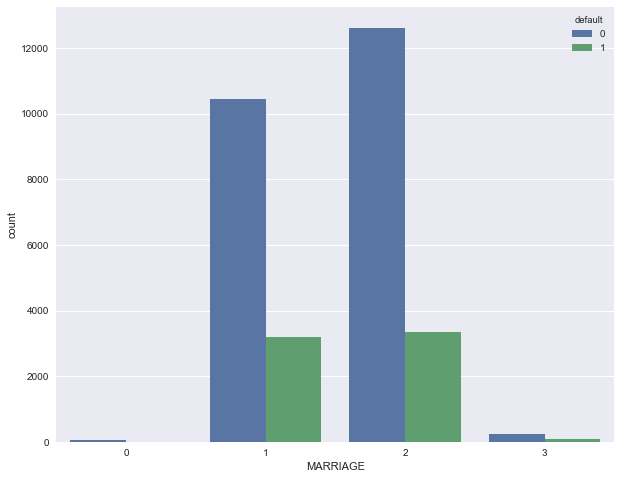

In [30]:
plt.figure(figsize=(10, 8))
sns.countplot(x='MARRIAGE', hue='default', data=data);

In [31]:
obs = pd.crosstab(data['MARRIAGE'], data['default'])
obs

default,0,1
MARRIAGE,,
0,49,5
1,10453,3206
2,12623,3341
3,239,84


Связь между семейным статусом и индикатором дефолта будем проверять с помощью коэффициента V Крамера. Для этого требуется проверить условия применимости:
- Выборки должны быть достаточно большими: n > 40.
- Ожидаемое количество элементов в каждой ячейке таблицы было меньше 5 не более, чем в 20% ячеек.

Потом посчитать значение статистики хи-квадрат, после чего воспользоваться формулой из лекции для коэффициента V Крамера: 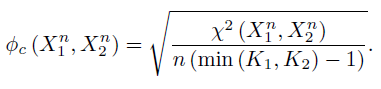

In [32]:
chi2, p, dof, ex = scipy.stats.chi2_contingency(obs)
print 'samples size: {} and {}'.format(obs[0].sum(), obs[1].sum())
ex > 5

samples size: 23364 and 6636


array([[ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True]], dtype=bool)

Условия применимости выполняются. 

In [33]:
n = obs.values.sum()
k1 = obs.shape[0]
k2 = obs.shape[1]

round(np.sqrt(chi2 / (n*(min(k1, k2) - 1))), 4)

0.0345

Коэффициент V Крамера получился близким к нулю. Взаимосвязь между семейным статусом и индикатором дефолта есть, но, скорее всего, очень слабая и практически не значима.

## Задание 5.
Возраст (AGE): Относительно двух групп людей вернувших и не вернувших кредит проверьте следующие гипотезы:
- a) о равенстве медианных значений возрастов людей 
- b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения?

Сравним визуально медианные значения с помощью boxplot.

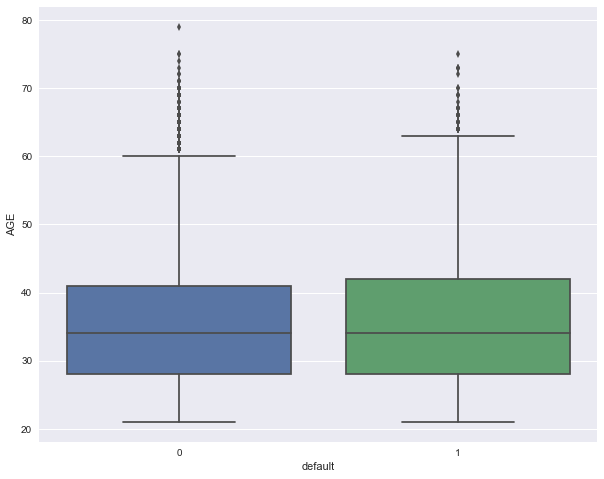

In [34]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='default', y='AGE', data=data);

Видно что медианы практически равны. Выборки независимы, проверим с помощью бутстрепа гипотезу о равенстве медианных значений возрастов людей, против альтернативы, что они не равны.

In [35]:
np.random.seed(1)

default_age = data[data['default'] == 1]['AGE'].values
non_default_age = data[data['default'] == 0]['AGE'].values

default_median_scores = map(np.median, get_bootstrap_samples(default_age, 1000))
non_default_median_scores = map(np.median, get_bootstrap_samples(non_default_age, 1000))

print "95% confidence interval for the default median repair time:", stat_intervals(default_median_scores, 0.05)
print "95% confidence interval for the non-default median repair time:", stat_intervals(non_default_median_scores, 0.05)

95% confidence interval for the default median repair time: [ 34.  35.]
95% confidence interval for the non-default median repair time: [ 34.  34.]


Интервалы пересекаются, на уровне значимости $\alpha = 0.05$ нулевую гипотезу о равенстве медианных значений возрастов людей отвергнуть нельзя. Посмотрим также на точечную и интервальную оценки разности медиан.

In [36]:
delta_median_scores = map(lambda x: x[1] - x[0], zip(default_median_scores, non_default_median_scores))
print "difference between medians:", np.median(default_age) - np.median(non_default_age)
print "95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05)

difference between medians: 0.0
95% confidence interval for the difference between medians [-1.  0.]


Видно, что разницы между медианными оценками нет.

Проверим теперь гипотезу о равенстве распределений. Для начала визуализируем распределения возрастов.

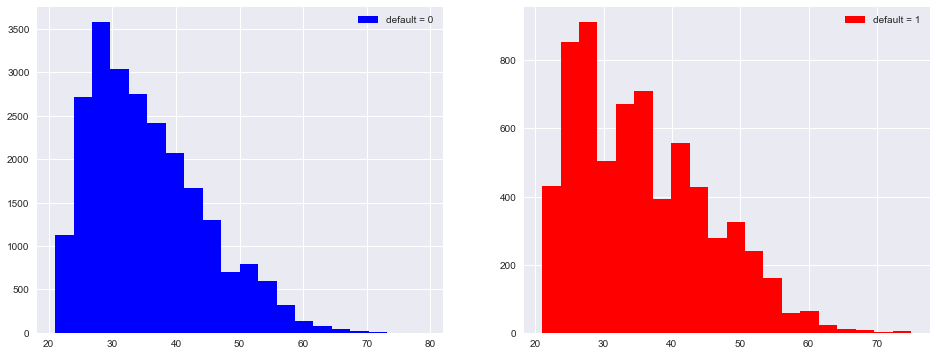

In [37]:
pylab.figure(figsize(16, 6))
pylab.subplot(1,2,1)
pylab.hist(data[data['default'] == 0]['AGE'], bins=20, color='b', label='default = 0')
pylab.legend()

pylab.subplot(1,2,2)
pylab.hist(data[data['default'] == 1]['AGE'], bins=20, color='r', label='default = 1')
pylab.legend()

pylab.show()

Кажется, что распределения похожи. Проверим это с помощью перестановочного критерия:

$H_0\colon F_{X_1}(x) = F_{X_2}(x)$

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$

Выборки независимые, условия применимости выполняются.

In [38]:
print "p-value: %f" % permutation_test(non_default_age, default_age, max_permutations=1000)

p-value: 0.018000


На уровне значимости $\alpha = 0.05$ нулевая гипотеза о равенстве распределений отвергается. С практической точки зрения результаты, скорее всего, не значимы, люди в одном и том же возрасте одинаково отдают или не отдают кредит.